In [ ]:
# Importing libraries

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
%matplotlib inline

In [ ]:
# Reading train data, adding labels

In [283]:
wage_df = pd.read_csv('data/adult.data', names = [ "age", "workclass", "weight", "education", "educationnum", "maritalstatus",
                                                 "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek",
                                                 "nativecountry", "salary"])

columns = [ "age", "workclass", "weight", "education", "educationnum", "maritalstatus",
                                                 "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek",
                                                 "nativecountry", "salary"]

wage_df['id'] = [random.randint(0,len(wage_df)) for x in range(wage_df.shape[0])]
wage_df.set_index('id', inplace=True)
wage_df.sample(4)
obj_df = wage_df.select_dtypes(include=['object']).copy()
obj_df.head()




,workclass,education,maritalstatus,occupation,relationship,race,sex,nativecountry,salary
id,,,,,,,,,
29596,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
28633,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2812,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
28908,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
29932,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [287]:
obj_df = wage_df.select_dtypes(include=['object']).copy()
obj_df.head()
obj_df[obj_df.isnull().any(axis=1)]
obj_df["nativecountry"].value_counts()
cleanup_nums = {"workclass":     {"?": 0, "Private": 1, "Self-emp-not-inc" : 2, "Local-gov" : 3, "State-gov" : 4,
                                 "Self-emp-inc" : 5, "Federal-gov" : 6, "Without-pay": 7 , "Never-worked" :8},
                "maritalstatus": {"?": 0, "Married-civ-spouse": 1, "Never-married" : 2, "Divorced" : 3, "Separated" : 4,
                                 "Widowed" : 5, "Married-spouse-absent" : 6, "Married-AF-spouse": 7 
                                 },
               
               "occupation": {"?": 0, "Prof-specialty": 1, "Craft-repair" : 2, "Exec-managerial" : 3, "Adm-clerical" : 4,
                                 "Sales" : 5, "Other-service" : 6, "Machine-op-inspct": 7 , "Transport-moving" :8 ,
                                 "Handlers-cleaners": 9, "Farming-fishing": 10, "Tech-support" : 11, "Protective-serv" : 13, 
                              "Priv-house-serv" : 14, "Armed-Forces" : 15 },
               "race" : {"White" : 1, "Black" :2, "Asian-Pac-Islander" : 3, "Amer-Indian-Eskimo":4, "Other":5},
                "sex" : {"Male" :1, "Female":2},
                "nativecountry":     {"?": 0, "United-States": 1, "Mexico" : 2, "Philippines" : 3, "Germany" : 4,
                                 "Canada" : 5, "Puerto-Rico" : 6, "El-Salvador": 7 , "India" :8,
                                    "Cuba": 9, "England": 10, "Jamaica" : 11, "South" : 13, 
                              "China" : 14, "Italy" : 15, "Dominican-Republic" :16, "Vietnam" : 17, "Guatemala" : 18,
                                 "Japan": 12, "Poland" : 19,"Columbia" : 20, 
                                      "Taiwan":                           51,
 "Haiti":                            44,
 "Iran":                             43,
 "Portugal":                         37,
 "Nicaragua":                        34,
 "Peru":                             31,
 "France":                           29,
 "Greece":                           29,
 "Ecuador":                          28,
 "Ireland":                          24,
 "Hong":                             20,
 "Cambodia":                         19,
 "Trinadad&Tobago":                  19,
 "Thailand":                         18,
 "Laos":                             18,
 "Yugoslavia":                       16,
 "Outlying-US(Guam-USVI-etc)":       14,
 "Hungary":                          13,
 "Honduras":                         13,
 "Scotland":                         12,
 "Holand-Netherlands":                1
                                     }
               }




 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
obj_df.replace(cleanup_nums, inplace=True)
obj_df.head()

In [ ]:
# Reading test data, removing row 1, adding labels

In [123]:
wage_test_df = pd.read_csv('data/adult.test', skiprows=1, names = ["age", "workclass", "weight", "education", "educationnum", "maritalstatus",
                                                 "occupation", "relationship", "race", "sex", "capitalgain", "capitalloss", "hoursperweek",
                                                 "nativecountry", "salary"])
wage_test_df.head(4)

,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.


In [44]:
wage_df.count() #count of dataset

age              32561
workclass        32561
weight           32561
education        32561
educationnum     32561
maritalstatus    32561
occupation       32561
relationship     32561
race             32561
sex              32561
capitalgain      32561
capitalloss      32561
hoursperweek     32561
nativecountry    32561
dtype: int64

In [160]:
wage_df.memory_usage() 

Index                80
age              260488
workclass        260488
weight           260488
education        260488
educationnum     260488
maritalstatus    260488
occupation       260488
relationship     260488
race             260488
sex              260488
capitalgain      260488
capitalloss      260488
hoursperweek     260488
nativecountry    260488
salary           260488
dtype: int64

In [161]:
wage_test_df.count()
wage_test_df.memory_usage() 

Index                80
age              130248
workclass        130248
weight           130248
education        130248
educationnum     130248
maritalstatus    130248
occupation       130248
relationship     130248
race             130248
sex              130248
capitalgain      130248
capitalloss      130248
hoursperweek     130248
nativecountry    130248
salary           130248
dtype: int64

In [191]:
wage_df.groupby('workclass').count() # 1836 ? values 6%
wage_df.groupby('occupation').count() # 1843 ? values
wage_df.groupby('nativecountry').count() #583
wage_df.groupby('salary').count() # 24% > and 76% <

,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
salary,,,,,,,,,,,,,,
<=50K,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720,24720
>50K,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841,7841


In [159]:
wage_test_df.groupby('workclass').count() # 963 ?
wage_test_df.groupby('occupation').count() # 966 ?
wage_test_df.groupby('nativecountry').count() #274
wage_test_df.groupby('salary').count() # 24% > and 76% <

,age,workclass,weight,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry
salary,,,,,,,,,,,,,,
<=50K.,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435,12435
>50K.,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846,3846


In [259]:
#Delete ? and transform variables
# wage_df['salary'] = np.where(wage_df['salary'] == '>50K.', 1, 0)
wage_df.dtypes

age               int64
workclass        object
weight            int64
education        object
educationnum      int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
nativecountry    object
salary           object
dtype: object

TypeError: Could not convert  <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K >50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K >50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K >50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K >50K <=50K >50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K <=50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K >50K <=50K >50K >50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K <=50K >50K <=50K <=50K >50K <=50K <=50K >50K to numeric

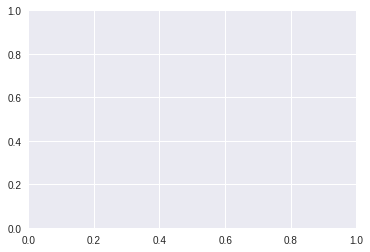

In [175]:
#Identify the features and the target 
#Chi Square
#Pairs

fig = plt.figure(figsize=(20,4))

fig.add_subplot(131)
sns.regplot(x='age', y='salary', data=wage_df, order=5)

fig.add_subplot(132)
sns.regplot(x='education', y='salary', data=wage_df)


print("Figure 1.1")


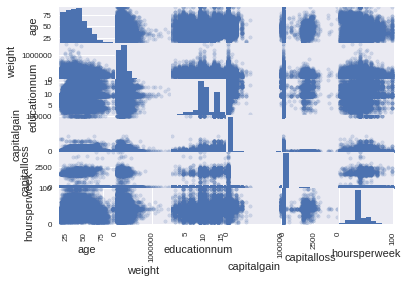

In [174]:
axes = pd.tools.plotting.scatter_matrix(wage_df, alpha=0.2)
fig = plt.figure(num=None, figsize=(6,3), dpi=100, facecolor='w', edgecolor='k')
fig.set_size_inches(18.5, 10.5, forward = True)
plt.savefig('scatter_matrix.png')

In [162]:
wage_df.describe()

,age,weight,educationnum,capitalgain,capitalloss,hoursperweek
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [47]:
wage_test_df.describe()

,workclass,education,sex,capitalgain,capitalloss
count,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
#Distribution plot of the target (if applicable)

In [ ]:
#Distribution plots of a few key features